In [1]:
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.style.use('ggplot')
# import nltk

In [2]:
df = pd.read_csv('BA_reviews.csv')
df

,Unnamed: 0,reviews
0,0,Not Verified | Everything was ok until our co...
1,1,Not Verified | My initial flight was cancelle...
2,2,Not Verified | We will never fly British Airw...
3,3,✅ Trip Verified | Check in and security cleara...
4,4,Not Verified | British Airways has confirmed ...
...,...,...
995,995,✅ Trip Verified | London Heathrow to Stuttgar...
996,996,✅ Trip Verified | London to Johannesburg. Tur...
997,997,✅ Trip Verified | Having booked BA Business C...
998,998,✅ Trip Verified | Vancouver to London Heathro...


### Lets split the strings into verified and not verified

In [3]:
df2 = df.copy()
my_res = {}
for i, rows in df2.iterrows():
    txt = rows['reviews']
    x = txt.split("|")
    my_res[i]= x[0]
    df2['reviews'][i]=x[1]
df2


C:\Users\Gbadamosi\AppData\Local\Temp\ipykernel_9760\2329612203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reviews'][i]=x[1]
C:\Users\Gbadamosi\AppData\Local\Temp\ipykernel_9760\2329612203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reviews'][i]=x[1]
C:\Users\Gbadamosi\AppData\Local\Temp\ipykernel_9760\2329612203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reviews'][i]=x[1]
C:\Users\Gbadamosi\App

,Unnamed: 0,reviews
0,0,Everything was ok until our connecting fligh...
1,1,My initial flight was cancelled 8 hours prio...
2,2,We will never fly British Airways again. Our...
3,3,Check in and security clearance very quick at...
4,4,British Airways has confirmed itself as the ...
...,...,...
995,995,London Heathrow to Stuttgart. Absolutely dis...
996,996,London to Johannesburg. Turning right to the...
997,997,Having booked BA Business Class and paid ext...
998,998,Vancouver to London Heathrow. I chose to fly...


In [4]:
my_res

{0: 'Not Verified ',
 1: 'Not Verified ',
 2: 'Not Verified ',
 3: '✅ Trip Verified ',
 4: 'Not Verified ',
 5: '✅ Trip Verified ',
 6: '✅ Trip Verified ',
 7: '✅ Trip Verified ',
 8: 'Not Verified ',
 9: 'Not Verified ',
 10: '✅ Trip Verified ',
 11: '✅ Trip Verified ',
 12: '✅ Trip Verified ',
 13: '✅ Trip Verified ',
 14: '✅ Trip Verified ',
 15: '✅ Trip Verified ',
 16: '✅ Trip Verified ',
 17: '✅ Trip Verified ',
 18: '✅ Trip Verified ',
 19: '✅ Trip Verified ',
 20: '✅ Trip Verified ',
 21: '✅ Trip Verified ',
 22: '✅ Trip Verified ',
 23: 'Not Verified ',
 24: '✅ Trip Verified ',
 25: '✅ Trip Verified ',
 26: '✅ Trip Verified ',
 27: '✅ Trip Verified ',
 28: '✅ Trip Verified ',
 29: '✅ Trip Verified ',
 30: '✅ Trip Verified ',
 31: 'Not Verified ',
 32: 'Not Verified ',
 33: '✅ Trip Verified ',
 34: 'Not Verified ',
 35: '✅ Trip Verified ',
 36: '✅ Trip Verified ',
 37: '✅ Trip Verified ',
 38: '✅ Trip Verified ',
 39: '✅ Trip Verified ',
 40: '✅ Trip Verified ',
 41: '✅ Trip Ve

In [5]:
check = pd.DataFrame(my_res, index = ['is_verified']).T

In [6]:
check.value_counts()

is_verified     
✅ Trip Verified     791
Not Verified        207
❎ Not Verified        2
Name: count, dtype: int64

In [7]:
check.is_verified[3][0]

'✅'

In [8]:
for i, rows in check.iterrows():
    # print(rows.is_verified[0])
    if rows.is_verified[0] in ['❎', '✅']:
        check.is_verified[i]= check.is_verified[i][2:]
    else:
        continue


In [9]:
check

,is_verified
0,Not Verified
1,Not Verified
2,Not Verified
3,Trip Verified
4,Not Verified
...,...
995,Trip Verified
996,Trip Verified
997,Trip Verified
998,Trip Verified


<Axes: title={'center': 'Count of verified and unverified'}, xlabel='is_verified'>

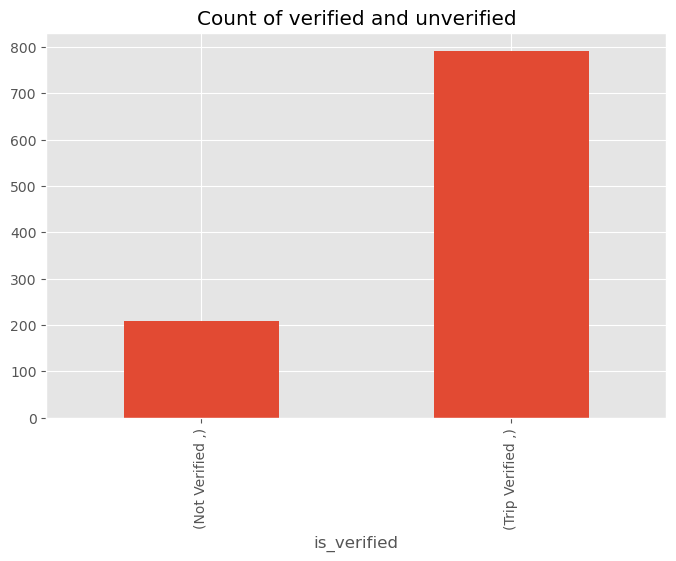

In [10]:
check.value_counts().sort_index().plot(kind='bar', title = 'Count of verified and unverified', figsize =(8,5))

##### Basic NLTK

In [11]:
example = df2['reviews'][50]
example

"  I don't understand why British Airways is classified as a 4 star airline? The service is really mediocre. The food is untasty and insufficient for a long haul trip. Some members of the cabin crew are friendly but they are not attentive enough and create a very basic experience. This really is all about getting from point A to B without what it used to be an enjoyable trip making experience. The inflight entertainment is fairly good, but you do need to bring your own water not to get dehydrated, some snacks and ideally food and perhaps smile to yourself as otherwise you are faced with just a cold, personality less experience. "

In [12]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I',
 'do',
 "n't",
 'understand',
 'why',
 'British',
 'Airways',
 'is',
 'classified',
 'as']

In [13]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('understand', 'VB'),
 ('why', 'WRB'),
 ('British', 'JJ'),
 ('Airways', 'NNPS'),
 ('is', 'VBZ'),
 ('classified', 'VBN'),
 ('as', 'IN')]

In [14]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  do/VBP
  n't/RB
  understand/VB
  why/WRB
  (GPE British/JJ)
  (ORGANIZATION Airways/NNPS)
  is/VBZ
  classified/VBN
  as/IN
  a/DT
  4/CD
  star/NN
  airline/NN
  ?/.
  The/DT
  service/NN
  is/VBZ
  really/RB
  mediocre/JJ
  ./.
  The/DT
  food/NN
  is/VBZ
  untasty/JJ
  and/CC
  insufficient/NN
  for/IN
  a/DT
  long/JJ
  haul/NN
  trip/NN
  ./.
  Some/DT
  members/NNS
  of/IN
  the/DT
  cabin/NN
  crew/NN
  are/VBP
  friendly/RB
  but/CC
  they/PRP
  are/VBP
  not/RB
  attentive/JJ
  enough/RB
  and/CC
  create/VB
  a/DT
  very/RB
  basic/JJ
  experience/NN
  ./.
  This/DT
  really/RB
  is/VBZ
  all/DT
  about/IN
  getting/VBG
  from/IN
  point/NN
  A/DT
  to/TO
  B/VB
  without/IN
  what/WP
  it/PRP
  used/VBD
  to/TO
  be/VB
  an/DT
  enjoyable/JJ
  trip/NN
  making/NN
  experience/NN
  ./.
  The/DT
  inflight/JJ
  entertainment/NN
  is/VBZ
  fairly/RB
  good/JJ
  ,/,
  but/CC
  you/PRP
  do/VBP
  need/VB
  to/TO
  bring/VB
  your/PRP$
  own/JJ
  water/NN
  not/RB
  

##### Using VADER sentiment scoring

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [16]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.9723}

In [17]:
df2.columns =['id', 'reviews']

In [18]:
def check_sentiment(d):
    max_key = next(iter(d))
 
    # Iterate over the keys in the dictionary
    for key in d:
        # If the value of the current key is greater than the value of max_key, update max_key
        if d[key] > d[max_key]:
            max_key = key
    # Print the key with the maximum value
    return max_key
    #This code is contributed by Edula Vinay Kumar Reddy

# Run the polarity score on the entire dataset
res = {}
for i, row in df2.iterrows():
    text = row['reviews']
    myid = row['id']
    temp = sia.polarity_scores(text)
    temp.pop('compound')

    res[myid] = check_sentiment(temp)

In [24]:
res

{0: 'neu',
 1: 'neu',
 2: 'neu',
 3: 'neu',
 4: 'neu',
 5: 'neu',
 6: 'neu',
 7: 'neu',
 8: 'neu',
 9: 'neu',
 10: 'neu',
 11: 'neu',
 12: 'neu',
 13: 'neu',
 14: 'neu',
 15: 'neu',
 16: 'neu',
 17: 'neu',
 18: 'neu',
 19: 'neu',
 20: 'neu',
 21: 'neu',
 22: 'neu',
 23: 'neu',
 24: 'neu',
 25: 'neu',
 26: 'neu',
 27: 'neu',
 28: 'neu',
 29: 'neu',
 30: 'neu',
 31: 'neu',
 32: 'neu',
 33: 'neu',
 34: 'neu',
 35: 'neu',
 36: 'neu',
 37: 'neu',
 38: 'neu',
 39: 'neu',
 40: 'neu',
 41: 'neu',
 42: 'neu',
 43: 'neu',
 44: 'neu',
 45: 'neu',
 46: 'neu',
 47: 'neu',
 48: 'neu',
 49: 'neu',
 50: 'neu',
 51: 'neu',
 52: 'neu',
 53: 'neu',
 54: 'neu',
 55: 'neu',
 56: 'neu',
 57: 'neu',
 58: 'neu',
 59: 'neu',
 60: 'neu',
 61: 'neu',
 62: 'neu',
 63: 'neu',
 64: 'neu',
 65: 'neu',
 66: 'neu',
 67: 'neu',
 68: 'neu',
 69: 'neu',
 70: 'neu',
 71: 'neu',
 72: 'neu',
 73: 'neu',
 74: 'neu',
 75: 'neu',
 76: 'neu',
 77: 'neu',
 78: 'neu',
 79: 'neu',
 80: 'neu',
 81: 'neu',
 82: 'neu',
 83: 'neu',
 8

In [32]:

vaders = pd.DataFrame(res, index=['sentiment']).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.join(df2['reviews'])


In [33]:
vaders.head(50)

,Id,sentiment,reviews
0,0,neu,Everything was ok until our connecting fligh...
1,1,neu,My initial flight was cancelled 8 hours prio...
2,2,neu,We will never fly British Airways again. Our...
3,3,neu,Check in and security clearance very quick at...
4,4,neu,British Airways has confirmed itself as the ...
5,5,neu,Worst BA experience. I was supposed to fly ou...
6,6,neu,My daughter and I were denied boarding on ou...
7,7,neu,Despite boarding being the usual free for all...
8,8,neu,"Flight cancelled, no crew! 9th September 202..."
9,9,neu,"The worst service ever, my baggage did not a..."


#### Vader said all values were neutral. Lets try hugging face transformers

In [12]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
# from scipy.special import softmax

c:\Users\Gbadamosi\miniconda3\envs\huggingfacetransformers\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [3]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [14]:
from scipy.special import softmax

In [15]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [16]:
res = {}
for i, row in df2.iterrows():
    try:
        text = row['reviews']
        myid = row['id']
        # vader_result = sia.polarity_scores(text)
        # vader_result_rename = {}
        # for key, value in vader_result.items():
        #     vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        # both = {**vader_result_rename, **roberta_result}
        res[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id {myid}')

Broke for id 20
Broke for id 42
Broke for id 87
Broke for id 101
Broke for id 156
Broke for id 161
Broke for id 180
Broke for id 203
Broke for id 211
Broke for id 289
Broke for id 309
Broke for id 374
Broke for id 433
Broke for id 455
Broke for id 510
Broke for id 579
Broke for id 580
Broke for id 717
Broke for id 741
Broke for id 774
Broke for id 874
Broke for id 898
Broke for id 962
Broke for id 974


In [17]:
res

{0: {'roberta_neg': 0.81589776,
  'roberta_neu': 0.16395009,
  'roberta_pos': 0.020152112},
 1: {'roberta_neg': 0.7004139,
  'roberta_neu': 0.26859963,
  'roberta_pos': 0.030986458},
 2: {'roberta_neg': 0.96503884,
  'roberta_neu': 0.03144661,
  'roberta_pos': 0.0035144982},
 3: {'roberta_neg': 0.03728098,
  'roberta_neu': 0.22536759,
  'roberta_pos': 0.7373514},
 4: {'roberta_neg': 0.92382896,
  'roberta_neu': 0.06955915,
  'roberta_pos': 0.0066119605},
 5: {'roberta_neg': 0.6707094,
  'roberta_neu': 0.2930225,
  'roberta_pos': 0.036268163},
 6: {'roberta_neg': 0.88025826,
  'roberta_neu': 0.10741136,
  'roberta_pos': 0.0123303905},
 7: {'roberta_neg': 0.003251599,
  'roberta_neu': 0.039652083,
  'roberta_pos': 0.9570964},
 8: {'roberta_neg': 0.9641789,
  'roberta_neu': 0.03217901,
  'roberta_pos': 0.003642106},
 9: {'roberta_neg': 0.97691387,
  'roberta_neu': 0.020087052,
  'roberta_pos': 0.002999172},
 10: {'roberta_neg': 0.9249736,
  'roberta_neu': 0.06776045,
  'roberta_pos': 0.00

In [18]:
def check_sentiment(d):
    max_key = next(iter(d))
 
    # Iterate over the keys in the dictionary
    for key in d:
        # If the value of the current key is greater than the value of max_key, update max_key
        if d[key] > d[max_key]:
            max_key = key
    # Print the key with the maximum value
    return max_key
    #This code is contributed by Edula Vinay Kumar Reddy


In [ ]:
for 

In [ ]:
res

{0: {'roberta_neg': 0.81589776,
  'roberta_neu': 0.16395009,
  'roberta_pos': 0.020152112},
 1: {'roberta_neg': 0.7004139,
  'roberta_neu': 0.26859963,
  'roberta_pos': 0.030986458},
 2: {'roberta_neg': 0.96503884,
  'roberta_neu': 0.03144661,
  'roberta_pos': 0.0035144982},
 3: {'roberta_neg': 0.03728098,
  'roberta_neu': 0.22536759,
  'roberta_pos': 0.7373514},
 4: {'roberta_neg': 0.92382896,
  'roberta_neu': 0.06955915,
  'roberta_pos': 0.0066119605},
 5: {'roberta_neg': 0.6707094,
  'roberta_neu': 0.2930225,
  'roberta_pos': 0.036268163},
 6: {'roberta_neg': 0.88025826,
  'roberta_neu': 0.10741136,
  'roberta_pos': 0.0123303905},
 7: {'roberta_neg': 0.003251599,
  'roberta_neu': 0.039652083,
  'roberta_pos': 0.9570964},
 8: {'roberta_neg': 0.9641789,
  'roberta_neu': 0.03217901,
  'roberta_pos': 0.003642106},
 9: {'roberta_neg': 0.97691387,
  'roberta_neu': 0.020087052,
  'roberta_pos': 0.002999172},
 10: {'roberta_neg': 0.9249736,
  'roberta_neu': 0.06776045,
  'roberta_pos': 0.00

In [23]:
temp_dict = {}
for values in res:
    max_sent = check_sentiment(res[values])
    temp_dict[values]= max_sent

In [24]:
temp_dict

{0: 'roberta_neg',
 1: 'roberta_neg',
 2: 'roberta_neg',
 3: 'roberta_pos',
 4: 'roberta_neg',
 5: 'roberta_neg',
 6: 'roberta_neg',
 7: 'roberta_pos',
 8: 'roberta_neg',
 9: 'roberta_neg',
 10: 'roberta_neg',
 11: 'roberta_neg',
 12: 'roberta_pos',
 13: 'roberta_pos',
 14: 'roberta_neg',
 15: 'roberta_neg',
 16: 'roberta_neg',
 17: 'roberta_neg',
 18: 'roberta_neg',
 19: 'roberta_neg',
 21: 'roberta_neg',
 22: 'roberta_neg',
 23: 'roberta_neg',
 24: 'roberta_neg',
 25: 'roberta_pos',
 26: 'roberta_neg',
 27: 'roberta_neg',
 28: 'roberta_neg',
 29: 'roberta_pos',
 30: 'roberta_pos',
 31: 'roberta_neu',
 32: 'roberta_neg',
 33: 'roberta_pos',
 34: 'roberta_neg',
 35: 'roberta_neg',
 36: 'roberta_neg',
 37: 'roberta_neg',
 38: 'roberta_pos',
 39: 'roberta_neu',
 40: 'roberta_pos',
 41: 'roberta_neu',
 43: 'roberta_neg',
 44: 'roberta_neg',
 45: 'roberta_neg',
 46: 'roberta_neg',
 47: 'roberta_neg',
 48: 'roberta_neg',
 49: 'roberta_pos',
 50: 'roberta_neg',
 51: 'roberta_neg',
 52: 'robe

In [32]:
final_df = pd.DataFrame(temp_dict, index = ['sent']).T

In [33]:
final_df

,sent
0,roberta_neg
1,roberta_neg
2,roberta_neg
3,roberta_pos
4,roberta_neg
...,...
995,roberta_neg
996,roberta_pos
997,roberta_neg
998,roberta_neu


In [34]:
final_df = final_df.join(df2['reviews'])

In [35]:
final_df

,sent,reviews
0,roberta_neg,Everything was ok until our connecting fligh...
1,roberta_neg,My initial flight was cancelled 8 hours prio...
2,roberta_neg,We will never fly British Airways again. Our...
3,roberta_pos,Check in and security clearance very quick at...
4,roberta_neg,British Airways has confirmed itself as the ...
...,...,...
995,roberta_neg,London Heathrow to Stuttgart. Absolutely dis...
996,roberta_pos,London to Johannesburg. Turning right to the...
997,roberta_neg,Having booked BA Business Class and paid ext...
998,roberta_neu,Vancouver to London Heathrow. I chose to fly...


In [36]:
final_df.sent.value_counts()

sent
roberta_neg    604
roberta_pos    301
roberta_neu     71
Name: count, dtype: int64